In [2]:
%run Olympics_Master.ipynb

In [3]:
events = pd.read_csv('athlete_events.csv')
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


0    80.0
1    60.0
2     NaN
3     NaN
4    82.0
Name: Weight, dtype: float64
float64
1
[ 80.          60.                  nan  82.          75.
  72.          96.          76.5         70.          55.5
  65.          85.          64.         130.         125.
  89.          77.          76.          98.          78.
  73.          93.          74.         106.          58.
  66.          71.          90.          87.          49.
  48.          83.          86.          55.          67.
  97.         105.          43.          79.          51.
  88.          62.          53.         104.          57.
  63.          52.          91.          94.          56.
  68.          61.          69.          46.         100.
  81.          92.         120.          95.          59.
  50.         117.5         54.          47.         117.
  84.         102.          40.         115.         110.
  45.          99.         109.          69.5        135.
  38.          77.5        103.         

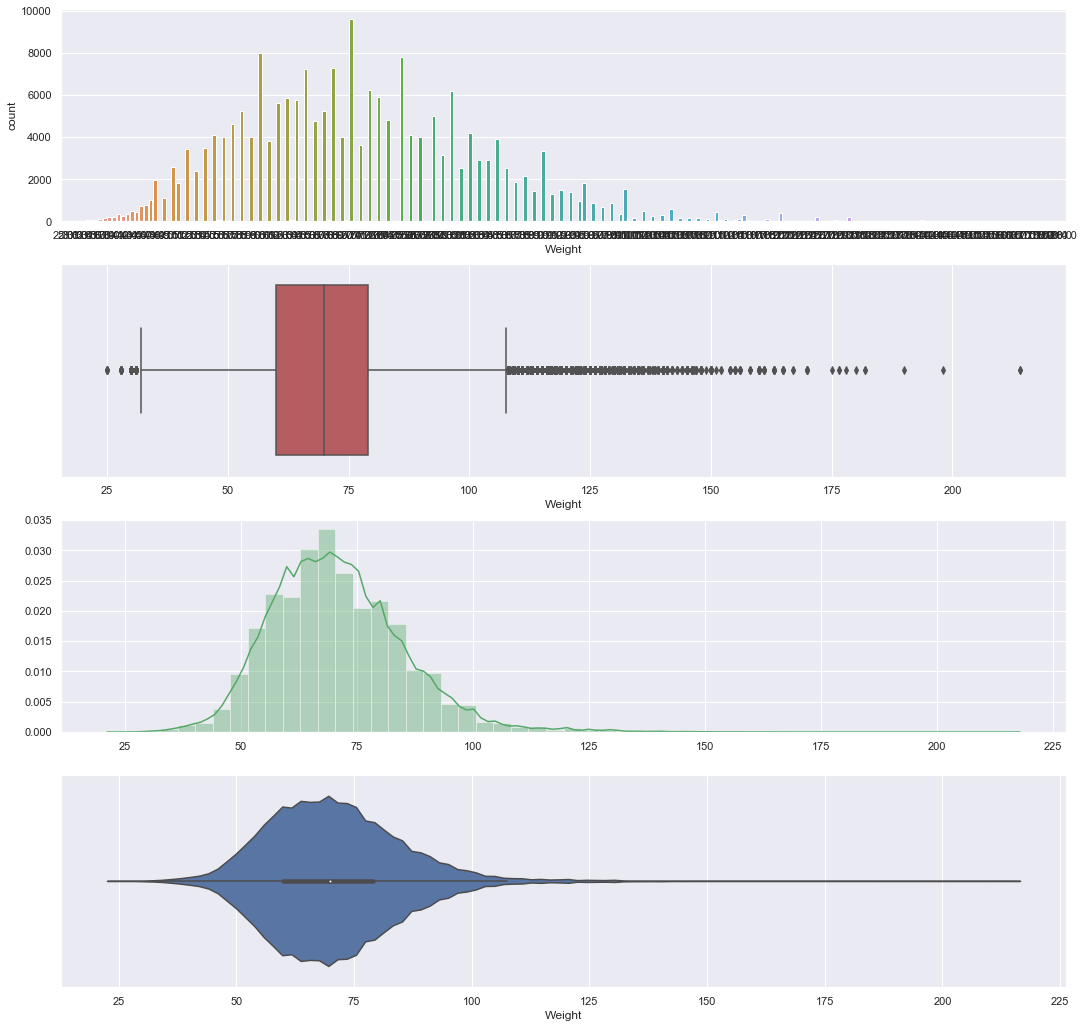

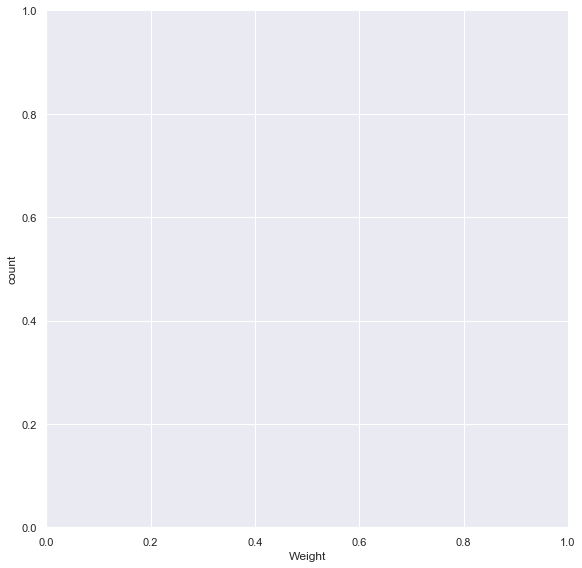

In [4]:
events_weight = olympics_var(events, "Weight")

0    180.0
1    170.0
2      NaN
3      NaN
4    185.0
Name: Height, dtype: float64
float64
1
[180. 170.  nan 185. 188. 183. 168. 186. 182. 172. 159. 171. 184. 175.
 189. 176. 163. 187. 169. 174. 190. 194. 177. 167. 164. 198. 165. 156.
 179. 178. 166. 181. 155. 160. 173. 192. 195. 191. 203. 158. 154. 153.
 152. 193. 162. 197. 157. 207. 147. 150. 202. 161. 210. 205. 200. 148.
 208. 140. 213. 204. 151. 196. 146. 201. 132. 149. 199. 211. 215. 139.
 206. 135. 142. 217. 209. 145. 221. 144. 214. 143. 218. 127. 223. 216.
 141. 212. 131. 136. 137. 138. 220. 130. 219. 133. 128. 226.]


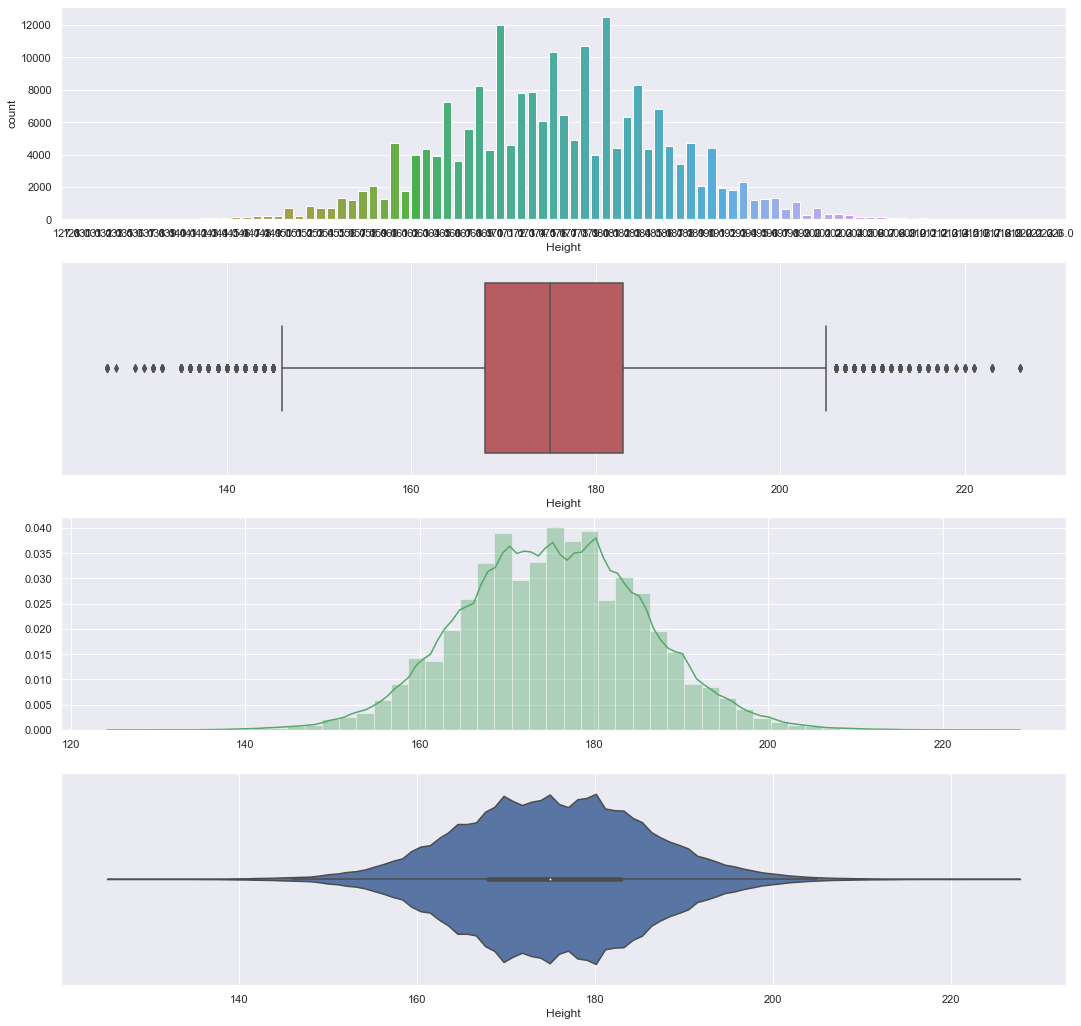

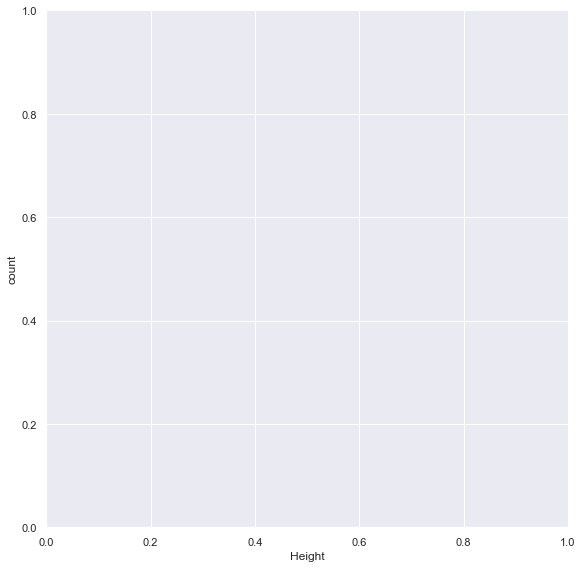

In [5]:
events_height = olympics_var(events, "Height")

In [6]:
bmi(events_weight, events_height)

          BMI
0   24.691358
1   20.761246
2         NaN
3         NaN
4   23.959094
5   23.959094
6   23.959094
7   23.959094
8   23.959094
9   23.959094
10  21.220009
11  21.220009
12  21.220009
13  21.220009
14  21.220009


,BMI
0,24.691358
1,20.761246
2,NaN
3,NaN
4,23.959094
...,...
271111,27.776911
271112,19.047004
271113,19.047004
271114,28.049671


In [ ]:
print(events_height.count())
print(events_height.isna().sum())
pp = events_height.dropna()
print(pp.isna().sum())
print(events_weight.head())

In [7]:
## Linear regression function for multi-variate analysis

def LinearReg(x, y):
    from sklearn.linear_model import LinearRegression
    x_clean = x.fillna(0)
    y_clean = y.fillna(0)
    x_1 = pd.concat([y_clean, x_clean], axis = 1, join_axes = [y_clean.index])
    f, axes = plt.subplots(1, 1, figsize=(12, 8))
    sb.heatmap(x_1.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
    sb.pairplot(data = x_1, dropna = True)
    # create the linear regression object
    linreg = LinearRegression()         
    # train the linear regression model
    linreg.fit(x_clean, y_clean)        
    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    # Print the Coefficients against Predictors
    print(pd.DataFrame(list(zip(x_clean.columns, linreg.coef_[0])), columns = [x_clean.index, "Coefficients"]))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  import sys


Intercept of Regression 	: b =  [25.62748989]
Coefficients of Regression 	: a =  [[2.04024838]]


TypeError: unhashable type: 'RangeIndex'

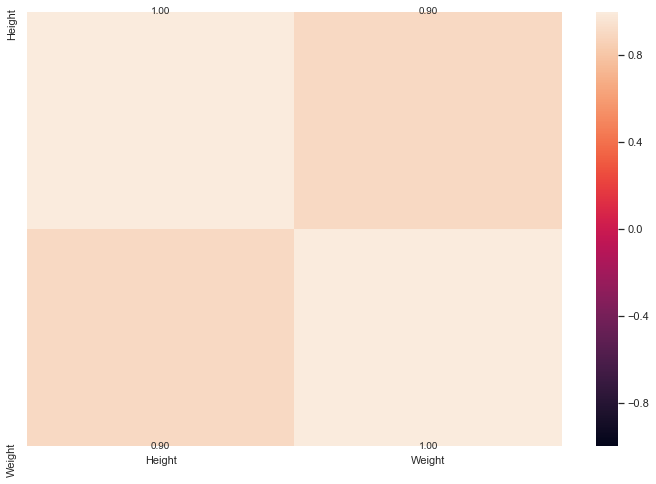

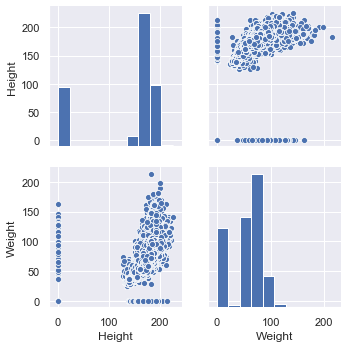

In [8]:
LinearReg(events_weight, events_height)